# タイタニックのデータ分析

In [1]:
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
class analyzer:
    def __init__(self, train_csv_file, test_csv_file, sep=",", engine="python"):
        self.train_df = pd.read_csv(train_csv_file, sep=sep, engine=engine)
        self.test_df = pd.read_csv(test_csv_file, sep=sep, engine=engine)

    def get_information(self):
        print(self.train_df.describe())
        print("先頭の5行を表示")
        print(self.train_df.head())
        print(f"train dataframeの形状を確認:{self.train_df.shape}")
        print(f"test dataframeの形状を確認:{self.test_df.shape}")
        print(f"indexの確認;{self.train_df.index}")  # 表の縦軸
        print(f"カラムの確認:{self.train_df.columns}")  # 表の横軸
        print(f"dataframeの各列のデータ型を確認:{self.train_df.dtypes}")
        print(f"欠損値の確認:\n{self.train_df.isnull().sum()}")

    def scatter_matrix(self):
        # 数値型の列だけ抽出
        numeric_df = self.train_df.select_dtypes(include="number").fillna(self.train_df.mean(numeric_only=True))#欠損値は平均値で補完
        pd.plotting.scatter_matrix(
            numeric_df,
            c=self.train_df["Survived"],
            figsize=(20, 20),
            marker="o",
            hist_kwds={"bins": 20},
            s=60,
            alpha=0.8,
            cmap=mglearn.cm3,
        )
        plt.show()

    def train_test_split(self, test_size=0.2, random_state=42):
        # 学習データとテストデータに分割
        X = self.train_df.drop("Survived", axis=1)#特徴量と目的変数を分けた
        y = self.train_df["Survived"]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X,
            y,
            test_size=test_size,
            train_size=1-test_size,
            random_state=random_state,
            shuffle=True,
            stratify=self.train_df["Survived"],
        )
        return self.X_train, self.X_test, self.y_train, self.y_test

    def knn_analysis_mean(self, X_train, X_test, y_train, y_test, n_neighbors=3, parameter1="Pclass", parameter2="Age"):
        knn=KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train[[parameter1, parameter2]].fillna(X_train[[parameter1, parameter2]].mean()), y_train)
        predection=knn.predict(X_test[[parameter1, parameter2]].fillna(X_train[[parameter1, parameter2]].mean()))
        print("欠損値を平均値で補完")
        print("Predection:{}".format(predection))
        print("test score:{:.2f}".format(np.mean(predection==y_test)))
    
    def knn_analysis_mode(self, X_train, X_test, y_train, y_test, n_neighbors=3, parameter1="Pclass", parameter2="Age"):
        knn=KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train[[parameter1, parameter2]].fillna(X_train[[parameter1, parameter2]].mode().iloc[0]), y_train)
        predection=knn.predict(X_test[[parameter1, parameter2]].fillna(X_train[[parameter1, parameter2]].mode().iloc[0]))
        print("欠損値を最頻値で補完")
        print("Predection:{}".format(predection))
        print("test score:{:.2f}".format(np.mean(predection==y_test)))

In [9]:
a=analyzer("data/train.csv", "data/test.csv")
a.get_information()

先頭の5行を表示
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
   PassengerId  Survived  Pclass  \
0            1         0       3   


## データの観察

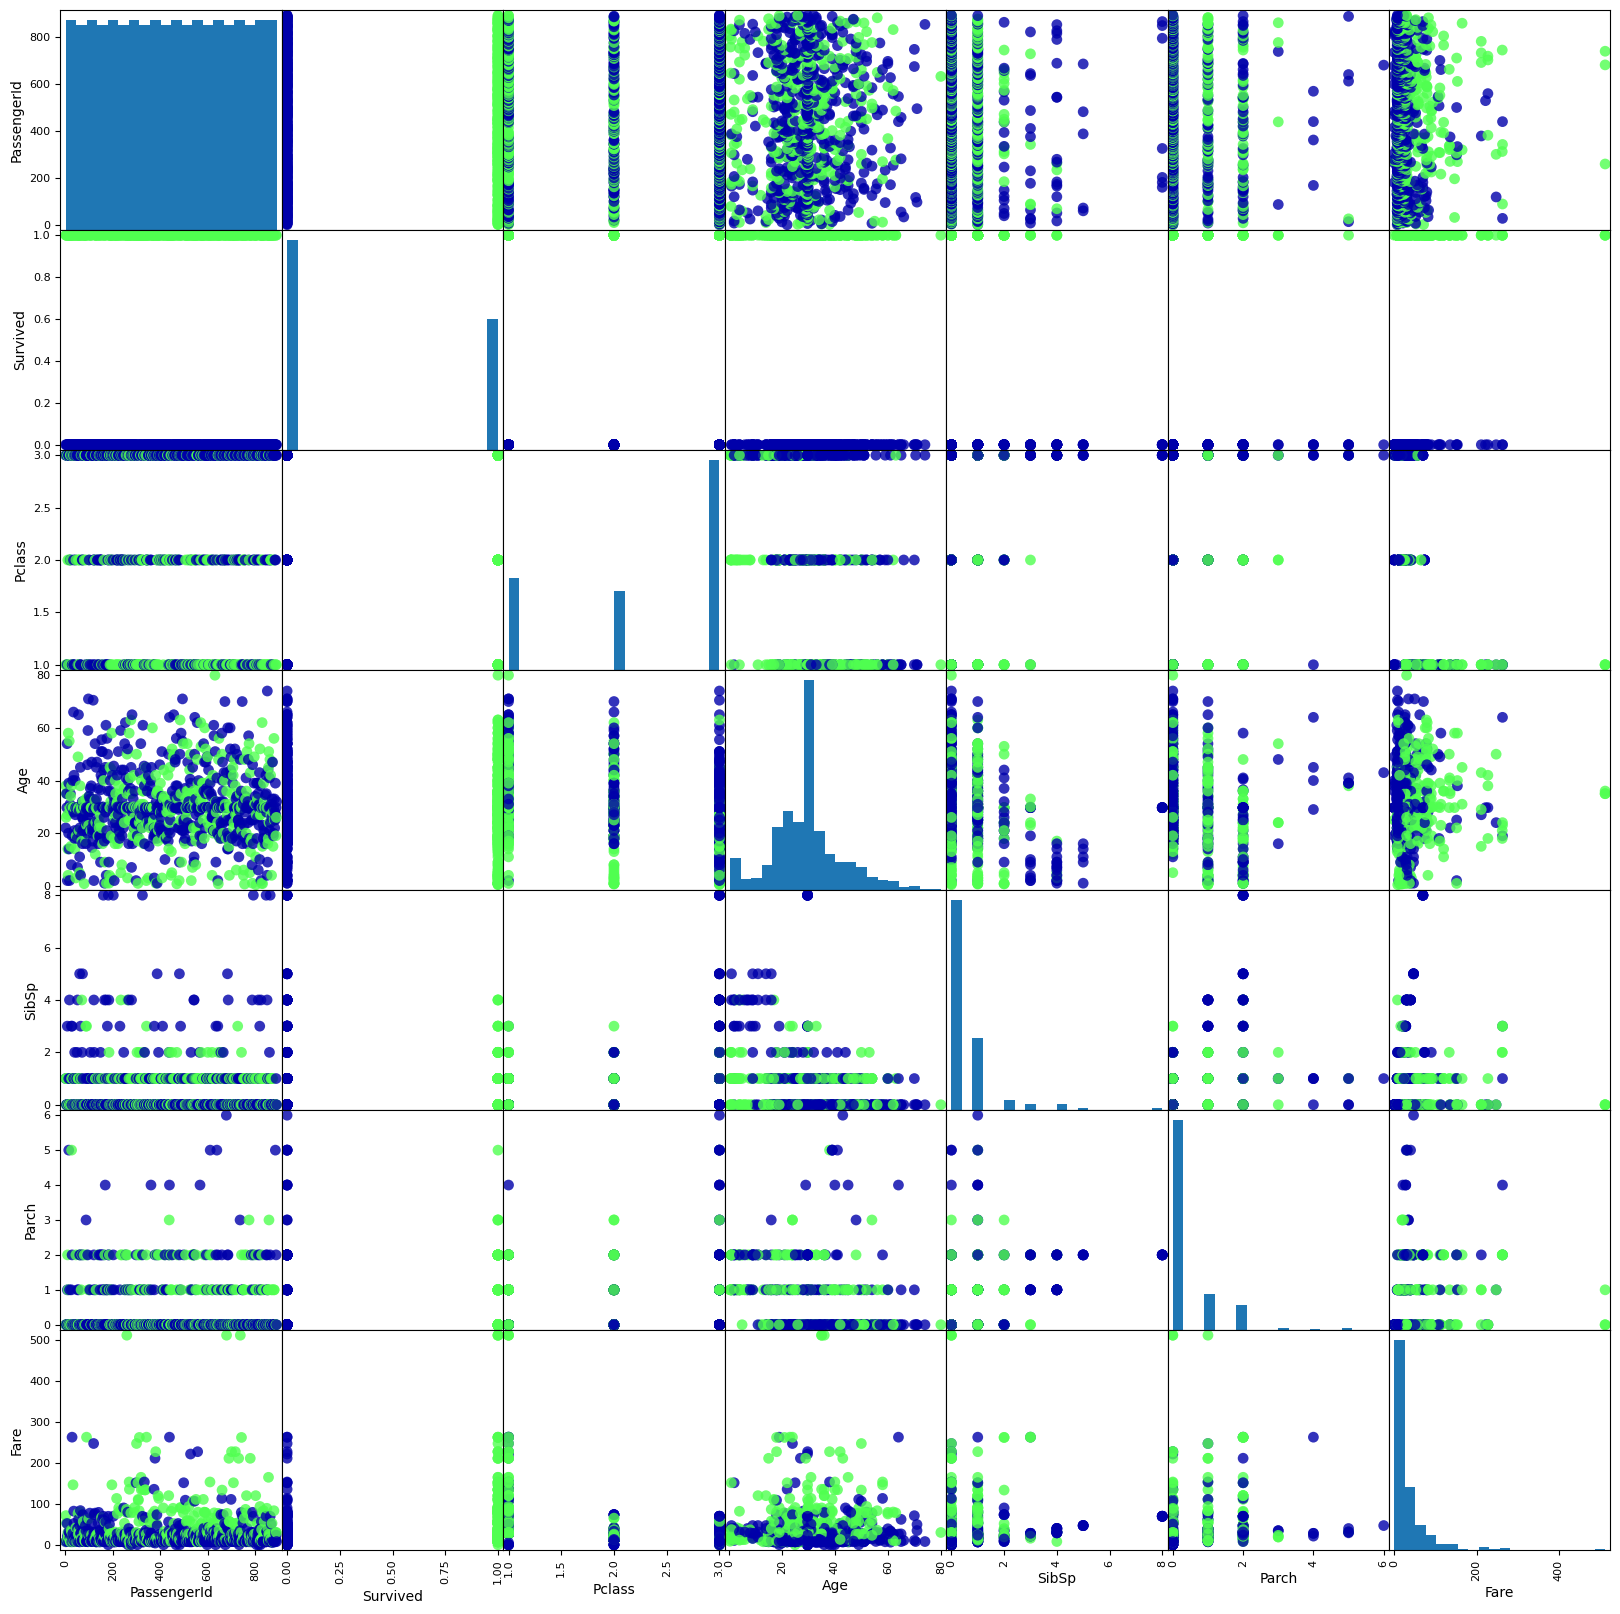

In [4]:
a.scatter_matrix()

## 学習データの分割

In [5]:
X_train, X_val, y_train, y_val = a.train_test_split()

## k-最近傍法

In [6]:
a.knn_analysis_mean(X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val, n_neighbors=8, parameter1="Pclass", parameter2="Age")
a.knn_analysis_mode(X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val, n_neighbors=8, parameter1="Pclass", parameter2="Age")

欠損値を平均値で補完
Predection:[0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
test score:0.62
欠損値を最頻値で補完
Predection:[0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
test score:0.64
